In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/YELP/SB/

PATH_OF_DATA='/content/drive/MyDrive/YELP/SB/'

 business.json		 mexican.ipynb			     test.html
 business_mexican.json	'Project Delivery structure .gdoc'   user_mexican.json
 Extraction.ipynb	 review_mexican.json


In [3]:
import json

# Opening JSON file
json_root = PATH_OF_DATA + 'business_mexican.json'
# f = open(json_root)

# business is a list of dic of business
business = []
f = open(json_root)
business = json.load(f)

print(len(business))

118


In [4]:
star = []
review_count = []
for bus in business:
  star.append(bus['stars'])
  review_count.append(bus['review_count'])

avg_star = round((sum(star)/len(star)),2)
avg_review_count = round((sum(review_count)/len(review_count)),2)

print("average star:" , round((sum(star)/len(star)),2))
print("average review count:" , round((sum(review_count)/len(review_count)),2))

average star: 3.84
average review count: 231.61


In [5]:
import random

# chosen_business = random.choice(business)
# print(chosen_business)
# print(chosen_business['review_count'])

chosen_id = 'eBxc95u_Gcs9bLST0UntOQ'
chosen_business = 0
for bu in business:
  if bu['business_id'] == chosen_id:
    chosen_business=bu

print(chosen_business)
print(chosen_business['review_count'])
business_star = chosen_business['stars']
business_review_count = chosen_business['review_count']



{'business_id': 'eBxc95u_Gcs9bLST0UntOQ', 'name': 'Santa Barbara Chicken Ranch', 'address': '2618 De La Vina St', 'city': 'Santa Barbara', 'state': 'CA', 'postal_code': '93105', 'latitude': 34.4352389, 'longitude': -119.7245736, 'stars': 4.0, 'review_count': 378, 'is_open': 1, 'attributes': {'RestaurantsReservations': 'False', 'Ambience': "{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': True}", 'GoodForKids': 'True', 'BYOBCorkage': "'no'", 'RestaurantsGoodForGroups': 'True', 'OutdoorSeating': 'True', 'RestaurantsAttire': "'casual'", 'RestaurantsTakeOut': 'True', 'NoiseLevel': "u'average'", 'WiFi': "u'no'", 'BikeParking': 'True', 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}", 'DogsAllowed': 'True', 'BusinessAcceptsCreditCards': 'True', 'HappyHour': 'False', 'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': True

In [6]:
import math
nearest_business = []
# print(chosen_business)
cor_chosen = [chosen_business['latitude'],chosen_business['longitude']]
distance = []
near_star = []
near_review_count = []
print(cor_chosen)
for bu in business:
  cor = [bu['latitude'], bu['longitude']]
  dis = math.dist(cor_chosen, cor)
  # find out those within around 1.5 miles
  if dis<0.02:
    near_star.append(bu['stars'])
    near_review_count.append(bu['review_count'])
  distance.append(dis)

# print(distance)
average_near_star = sum(near_star)/len(near_star)
average_near_review_count = sum(near_review_count)/len(near_review_count)
print(average_near_star)
print(average_near_review_count)



# count = 0
# for dis in distance:
#   if dis<0.02:
#     count += 1

# print(count)



[34.4352389, -119.7245736]
3.6842105263157894
127.47368421052632


In [7]:
import plotly.graph_objects as go

# if want to redraw the map, please restart and run all to avoid duplicate trace adding

# Sample data for two companies
average_star = [avg_star]
average_near_star = [average_near_star]
business_star = [business_star]
average_review_count = [avg_review_count]
average_near_review_count = [average_near_review_count]
business_review_count = [business_review_count]

categories = ['star', 'review_count']

# Create a bar chart for Company 1
fig_compare = go.Figure()

# Add bar traces for 'star' data with the primary y-axis (y-axis on the left)
fig_compare.add_trace(go.Bar(name='Average Overall Star', x=categories[:1], y=average_star, yaxis='y', marker_color = '#FF5733'))
fig_compare.add_trace(go.Bar(name='Average Near Star', x=categories[:1], y=average_near_star, yaxis='y', marker_color = '#FFA533'))
fig_compare.add_trace(go.Bar(name='Business Star', x=categories[:1], y=business_star, yaxis='y',marker_color = '#3366FF'))


# Add bar traces for 'review_count' data with the secondary y-axis (y-axis on the right)
fig_compare.add_trace(go.Bar(name='Average Overall Review Count', x=categories[1:], y=average_review_count, yaxis='y2',marker_color = '#FF5733'))
fig_compare.add_trace(go.Bar(name='Average Near Review Count', x=categories[1:], y=average_near_review_count, yaxis='y2',marker_color = '#FFA533'))
fig_compare.add_trace(go.Bar(name='Business Review Count', x=categories[1:], y=business_review_count, yaxis='y2',marker_color = '#3366FF'))

# Define the layout with dual y-axes
fig_compare.update_layout(
    title='Business Data comparision',
    xaxis_title='Categories <br><br> (We condiser businesses within 1.5 mile of the chosen business as near)',
    yaxis_title='Star',
    yaxis2=dict(
        title='Review Count',
        overlaying='y',
        side='right'
    ),
    yaxis=dict(range=[0, 5]),  # Set the range for the primary y-axis
    barmode='group'  # 'group' mode displays bars side by side
)

# Show the plot
fig_compare.show()


In [8]:
json_root = PATH_OF_DATA + 'review_mexican.json'
# f = open(json_root)

# business is a list of dic of business
review = []
f = open(json_root)
review = json.load(f)

print(len(review))


27940


In [9]:
review_c = 0
for bu in business:
  review_c += bu['review_count']

print(review_c)


chosen_review = []
chosen_review_text = []
for rev in review:
  if rev['business_id'] == chosen_id:
    chosen_review.append(rev)
    chosen_review_text.append(rev['text'])

print(len(chosen_review))

27330
383


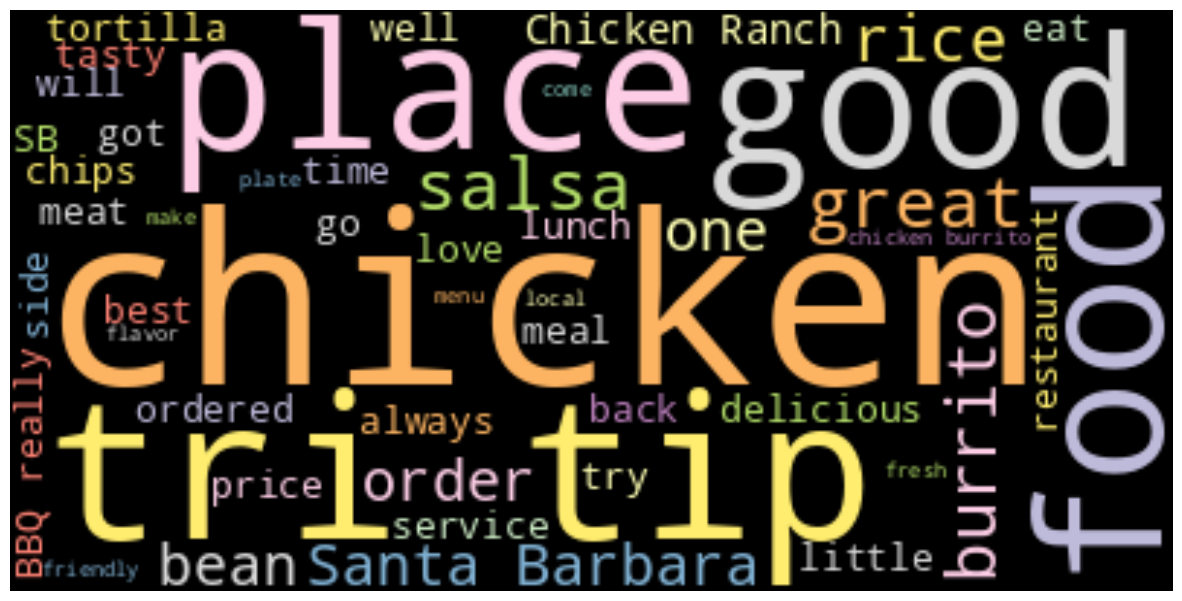

<Figure size 1000x600 with 0 Axes>

{'chicken': 1.0, 'tri tip': 0.6852791878172588, 'good': 0.5609137055837563, 'place': 0.550761421319797, 'food': 0.5177664974619289, 'great': 0.38071065989847713, 'salsa': 0.37817258883248733, 'burrito': 0.3147208121827411, 'rice': 0.27411167512690354, 'bean': 0.2182741116751269, 'Santa Barbara': 0.21065989847715735, 'one': 0.20812182741116753, 'order': 0.20304568527918782, 'Chicken Ranch': 0.20304568527918782, 'always': 0.18781725888324874, 'go': 0.18781725888324874, 'delicious': 0.18527918781725888, 'meat': 0.1751269035532995, 'love': 0.16243654822335024, 'ordered': 0.15736040609137056, 'well': 0.14720812182741116, 'got': 0.1446700507614213, 'tortilla': 0.1446700507614213, 'meal': 0.14213197969543148, 'BBQ': 0.13705583756345177, 'tasty': 0.13705583756345177, 'SB': 0.13705583756345177, 'time': 0.13451776649746192, 'eat': 0.13451776649746192, 'service': 0.1319796954314721, 'best': 0.1319796954314721, 'chips': 0.12944162436548223, 'price': 0.12944162436548223, 'little': 0.126903553299492

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator



text = " ".join(str(each) for each in chosen_review_text)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=50,colormap='Set3', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

print(wordcloud.words_)


In [11]:
words = wordcloud.words_.keys()
frequencies = wordcloud.words_.values()
print(words)
print(frequencies)

dict_keys(['chicken', 'tri tip', 'good', 'place', 'food', 'great', 'salsa', 'burrito', 'rice', 'bean', 'Santa Barbara', 'one', 'order', 'Chicken Ranch', 'always', 'go', 'delicious', 'meat', 'love', 'ordered', 'well', 'got', 'tortilla', 'meal', 'BBQ', 'tasty', 'SB', 'time', 'eat', 'service', 'best', 'chips', 'price', 'little', 'restaurant', 'back', 'will', 'try', 'side', 'lunch', 'really', 'chicken burrito', 'fresh', 'come', 'plate', 'menu', 'flavor', 'friendly', 'local', 'make'])
dict_values([1.0, 0.6852791878172588, 0.5609137055837563, 0.550761421319797, 0.5177664974619289, 0.38071065989847713, 0.37817258883248733, 0.3147208121827411, 0.27411167512690354, 0.2182741116751269, 0.21065989847715735, 0.20812182741116753, 0.20304568527918782, 0.20304568527918782, 0.18781725888324874, 0.18781725888324874, 0.18527918781725888, 0.1751269035532995, 0.16243654822335024, 0.15736040609137056, 0.14720812182741116, 0.1446700507614213, 0.1446700507614213, 0.14213197969543148, 0.13705583756345177, 0.1

In [12]:
import plotly.graph_objects as go
from wordcloud import WordCloud


# Create a dictionary of words and frequencies
word_freq = dict(zip(words, frequencies))

# Generate the word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_freq)

# Convert the word cloud image to a Plotly figure
fig_word_cloud = go.Figure(go.Image(z=wordcloud.to_array()))

# Customize the layout (if needed)
fig_word_cloud.update_layout(
    title='Word Cloud',
    xaxis=dict(showticklabels=False, showgrid=False, zeroline=False),
    yaxis=dict(showticklabels=False, showgrid=False, zeroline=False)
)

# Show the word cloud plot
fig_word_cloud.show()


Output hidden; open in https://colab.research.google.com to view.

In [13]:
import plotly.subplots as sp
from plotly.subplots import make_subplots

# Create a new subplot figure with 1 row and 2 columns
combined_fig = make_subplots(rows=2, cols=2)

# Add fig_compare (fig1) traces to the first subplot (1,1) of combined_fig
for trace in fig_compare.data:
    combined_fig.add_trace(trace, row=1, col=1)

# Add fig_word_cloud (fig2) to the second subplot (1,2) of combined_fig
combined_fig.add_trace(fig_word_cloud.data[0], row=2, col=1)

# Copy the layout settings from fig_compare (fig1) to combined_fig
combined_fig.update_layout(fig_compare.layout)

# Show the combined plot
combined_fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [14]:
# combined_fig.write_html("/content/drive/MyDrive/YELP/SB/test.html")
open('/content/drive/MyDrive/YELP/SB/test.html', 'w').close()
with open('/content/drive/MyDrive/YELP/SB/test.html', 'a') as f:
    f.write(fig_compare.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig_word_cloud.to_html(full_html=False, include_plotlyjs='cdn'))


In [15]:
top_15 = {}

count = 0
for key in wordcloud.words_.keys():
  # each review contains 3 element, first is total star, second is review count and third is the average star
  top_15[key] = [0,0,0]
  count+= 1
  if count >15: break

print(top_15)

top_15_star = top_15.copy()
top_15_sent = top_15.copy()

{'chicken': [0, 0, 0], 'tri tip': [0, 0, 0], 'good': [0, 0, 0], 'place': [0, 0, 0], 'food': [0, 0, 0], 'great': [0, 0, 0], 'salsa': [0, 0, 0], 'burrito': [0, 0, 0], 'rice': [0, 0, 0], 'bean': [0, 0, 0], 'Santa Barbara': [0, 0, 0], 'one': [0, 0, 0], 'order': [0, 0, 0], 'Chicken Ranch': [0, 0, 0], 'always': [0, 0, 0], 'go': [0, 0, 0]}


In [16]:
for review in chosen_review:
  for key in top_15_star.keys():
    if key in review['text']:
      top_15_star[key][0] += review['stars']
      top_15_star[key][1] += 1

avg_star = []
for key in top_15_star.keys():
  top_15_star[key][2] = round(top_15_star[key][0]/top_15_star[key][1],2)
  avg_star.append(round(top_15_star[key][0]/top_15_star[key][1],2))

print(top_15_star)
print(avg_star)

{'chicken': [1069.0, 262, 4.08], 'tri tip': [303.0, 76, 3.99], 'good': [566.0, 144, 3.93], 'place': [648.0, 157, 4.13], 'food': [613.0, 153, 4.01], 'great': [397.0, 93, 4.27], 'salsa': [597.0, 143, 4.17], 'burrito': [489.0, 122, 4.01], 'rice': [695.0, 174, 3.99], 'bean': [473.0, 118, 4.01], 'Santa Barbara': [271.0, 63, 4.3], 'one': [378.0, 99, 3.82], 'order': [339.0, 94, 3.61], 'Chicken Ranch': [179.0, 44, 4.07], 'always': [230.0, 56, 4.11], 'go': [871.0, 221, 3.94]}
[4.08, 3.99, 3.93, 4.13, 4.01, 4.27, 4.17, 4.01, 3.99, 4.01, 4.3, 3.82, 3.61, 4.07, 4.11, 3.94]


In [17]:
pip install vaderSentiment

In [18]:
import nltk
nltk.download('punkt')

test_text = "The food is great, but the service is horroble. well it is ok"

nltk.sent_tokenize(test_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['The food is great, but the service is horroble.', 'well it is ok']

In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

count = 0
for key in wordcloud.words_.keys():
  # each review contains 3 element, first is total star, second is review count and third is the average star
  top_15[key] = [0,0,0]
  count+= 1
  if count >15: break

# print(top_15)
top_15_sent = top_15.copy()
print(top_15_sent)
worst_reviews = []
sent_threshold = 0.0

for review in chosen_review:
  for key in top_15_sent.keys():
    # here we seperate the reviews into sentences to avoid good + bad reviews to be neutral for different topics
    sep_text = nltk.sent_tokenize(review['text'])
    # sep_text = review['text']
    for text in sep_text:
      if key in text:
        score = sentiment.polarity_scores(text)
        if score['compound']<sent_threshold:
          worst_reviews.append(text)
        # print(score['compound'])
        top_15_sent[key][0] += score['compound']
        top_15_sent[key][1] += 1

avg_sent = []

for key in top_15_sent.keys():
  if top_15_sent[key][1] != 0:
    top_15_sent[key][2] = round(top_15_sent[key][0]/top_15_sent[key][1],3)
    avg_sent.append(round(top_15_sent[key][0]/top_15_sent[key][1],3))


# sent_1 = sentiment.polarity_scores(text_1)
print(top_15_sent)
print(avg_sent)
# print(len(worst_reviews))

{'chicken': [0, 0, 0], 'tri tip': [0, 0, 0], 'good': [0, 0, 0], 'place': [0, 0, 0], 'food': [0, 0, 0], 'great': [0, 0, 0], 'salsa': [0, 0, 0], 'burrito': [0, 0, 0], 'rice': [0, 0, 0], 'bean': [0, 0, 0], 'Santa Barbara': [0, 0, 0], 'one': [0, 0, 0], 'order': [0, 0, 0], 'Chicken Ranch': [0, 0, 0], 'always': [0, 0, 0], 'go': [0, 0, 0]}
{'chicken': [120.9847999999999, 426, 0.284], 'tri tip': [21.464999999999996, 97, 0.221], 'good': [93.65999999999985, 206, 0.455], 'place': [73.37019999999997, 215, 0.341], 'food': [72.89549999999998, 195, 0.374], 'great': [80.66189999999997, 120, 0.672], 'salsa': [59.503799999999984, 170, 0.35], 'burrito': [42.1823, 179, 0.236], 'rice': [51.359299999999976, 217, 0.237], 'bean': [23.627799999999997, 130, 0.182], 'Santa Barbara': [16.343, 80, 0.204], 'one': [36.6178, 155, 0.236], 'order': [15.436100000000005, 131, 0.118], 'Chicken Ranch': [9.5347, 58, 0.164], 'always': [16.951999999999998, 66, 0.257], 'go': [121.77849999999985, 377, 0.323]}
[0.284, 0.221, 0.4

In [20]:
import plotly.graph_objects as go

# if want to redraw the map, please restart and run all to avoid duplicate trace adding

# Sample data for two companies
average_star = avg_star

average_sentimental_point = avg_sent


categories = []
for key in top_15.keys():
  categories.append(key)

print(categories)

# Create a bar chart for Company 1
fig_key = go.Figure()

# Add bar traces for 'star' data with the primary y-axis (y-axis on the left)
fig_key.add_trace(go.Bar(name='Average Star', x=categories, y=average_star, yaxis='y'))


# Add bar traces for 'sentimental_point' data with the secondary y-axis (y-axis on the right)
fig_key.add_trace(go.Bar(name='Average Sentimental Poitn', x=categories, y=average_sentimental_point, yaxis='y2'))

fig_key.add_hline(y=chosen_business['stars'],line_dash="dash", line_color="green", name = "business star")


# Define the layout with dual y-axes
fig_key.update_layout(
    title='Key Words info',
    xaxis_title='Key Words',
    yaxis_title='Star',
    yaxis2=dict(
        title='Sentimental Points',
        overlaying='y',
        side='right'
    ),
    yaxis=dict(range=[0, 5]),  # Set the range for the primary y-axis
    barmode='group'  # 'group' mode displays bars side by side
)

# Show the plot
fig_key.show()


['chicken', 'tri tip', 'good', 'place', 'food', 'great', 'salsa', 'burrito', 'rice', 'bean', 'Santa Barbara', 'one', 'order', 'Chicken Ranch', 'always', 'go']


In [21]:
with open('/content/drive/MyDrive/YELP/SB/test.html', 'a') as f:
    f.write(fig_key.to_html(full_html=False, include_plotlyjs='cdn'))


In [22]:
# Opening JSON file
json_root = PATH_OF_DATA + 'user_mexican.json'
# f = open(json_root)

# business is a list of dic of business
user = []
f = open(json_root)
user = json.load(f)

print(len(user))

22107


In [23]:
chosen_user_id = []

for review in chosen_review:
  if review['user_id'] not in chosen_user_id:
    chosen_user_id.append(review['user_id'])


print(len(chosen_user_id))

378


In [24]:
chosen_user = []
for u in user:
  if u['user_id'] in chosen_user_id:
    chosen_user.append(u)

print(len(chosen_user))
print(chosen_user)

378
[{'user_id': 'QuZbJquRtbY9O9JrB9NpxQ', 'name': 'Jim', 'review_count': 1732, 'yelping_since': '2007-07-07 11:46:47', 'useful': 10473, 'funny': 7745, 'cool': 7730, 'elite': '2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,20,20,2021', 'friends': 'Yc3g0KMp3991QIC4Ot1fxQ, eZKyqqZUG06YxG2N-9nhKQ, kxWUjoQSss3yJYyC6exiGQ, iYopahXM4KOQ57NOATEhiA, t8a4wTKqHjF6b_6VqBfr8A, p8yQsVA51dzkc9cecDpvrw, Kkbf_tYgaOe3CtiRILil4A, AMqRKxavwt1yTBzlMrG8sQ, I5ZsSESQutmB9H6K5e4vBw, SIP1Dfwy1M0HWzdgGg9H9g, x3i9lXHhhKZ5JedV8Sj3nw, oAj2t0BSAGW_etGHD8SMNw, uRcZURC3ituvPT0en9l3xA, BSvnbmtpOCTA4bwXLGBwUg, bgOjO-HX-7wzUlXeXJJ2pA, yszYcfzs9iyQ4cAnE2sMvg, 5ejKB5V2vsYjWPkRbT4dqQ, 6bI4EzZSJDHBoNhpkOA-sA, 9d52DhEbJQ1w5LXaZw4nzQ, w-2UqYpO7OozweB6lL7zEQ, y9Q9uJ23WDjcRzp4RrCMvA, 3mRBBziuhLOfZ7saU7UAQQ, igll2PdsMvQHzJhzttrx1A, r7zUJCHE7xKDmxhvjg3Nug, KDb7ej6DK3D0IKS6LuUZHA, XEHZoTDWjw3w-gcQyYIe4g, EEUw-6sgst8qxFcByYhWAQ, KGsXnYHvYddGaL_jyl0DMQ, _boS5cxjKAm9aoTViJgo-g, cHpXABKFJ9oWZwE4IK-Z8Q, 2l0O1EI1m0yWjF

In [25]:
# count = 0
elite_user_id = []
for user in chosen_user:
  if len(user['elite']) >0:
    # print(user['elite'])
    # count += 1
    elite_user_id.append(user['user_id'])

print(len(elite_user_id))


79


In [26]:
elite_review_text = []
elite_review = []
for review in chosen_review:
  if review['user_id'] in elite_user_id:
    elite_review_text.append(review['text'])
    elite_review.append(review)

print(len(elite_review_text))

81


In [27]:
text = " ".join(str(each) for each in elite_review_text)
# Create and generate a word cloud image:
wordcloud_elite = WordCloud(max_words=50,colormap='Set3', background_color="black").generate(text)

In [28]:
elite_top_15 = {}

count = 0
for key in wordcloud_elite.words_.keys():
  # each review contains 3 element, first is total star, second is review count and third is the average star
  elite_top_15[key] = [0,0,0]
  count+= 1
  if count >15: break

print(elite_top_15)
elite_top_15_star = elite_top_15.copy()
elite_top_15_sent = elite_top_15.copy()

{'chicken': [0, 0, 0], 'good': [0, 0, 0], 'tri tip': [0, 0, 0], 'place': [0, 0, 0], 'burrito': [0, 0, 0], 'food': [0, 0, 0], 'salsa': [0, 0, 0], 'rice': [0, 0, 0], 'beans': [0, 0, 0], 'great': [0, 0, 0], 'well': [0, 0, 0], 'Chicken Ranch': [0, 0, 0], 'delicious': [0, 0, 0], 'Santa Barbara': [0, 0, 0], 'meat': [0, 0, 0], 'love': [0, 0, 0]}


In [29]:
for review in elite_review:
  for key in elite_top_15_star.keys():
    if key in review['text']:
      elite_top_15_star[key][0] += review['stars']
      elite_top_15_star[key][1] += 1

elite_avg_star = []
for key in elite_top_15_star.keys():
  elite_top_15_star[key][2] = round(elite_top_15_star[key][0]/elite_top_15_star[key][1],2)
  elite_avg_star.append(round(elite_top_15_star[key][0]/elite_top_15_star[key][1],2))

print(elite_top_15_star)
print(elite_avg_star)

{'chicken': [294.0, 69, 4.26], 'good': [152.0, 36, 4.22], 'tri tip': [59.0, 14, 4.21], 'place': [181.0, 42, 4.31], 'burrito': [125.0, 28, 4.46], 'food': [166.0, 38, 4.37], 'salsa': [165.0, 40, 4.12], 'rice': [191.0, 45, 4.24], 'beans': [155.0, 37, 4.19], 'great': [80.0, 19, 4.21], 'well': [92.0, 22, 4.18], 'Chicken Ranch': [49.0, 11, 4.45], 'delicious': [78.0, 18, 4.33], 'Santa Barbara': [83.0, 18, 4.61], 'meat': [55.0, 12, 4.58], 'love': [77.0, 18, 4.28]}
[4.26, 4.22, 4.21, 4.31, 4.46, 4.37, 4.12, 4.24, 4.19, 4.21, 4.18, 4.45, 4.33, 4.61, 4.58, 4.28]


In [30]:
sentiment = SentimentIntensityAnalyzer()

count = 0
for key in wordcloud_elite.words_.keys():
  # each review contains 3 element, first is total star, second is review count and third is the average star
  elite_top_15[key] = [0,0,0]
  count+= 1
  if count >15: break

# print(top_15)
elite_top_15_sent = elite_top_15.copy()
print(elite_top_15_sent)
worst_reviews = []
sent_threshold = 0.0

for review in elite_review:
  for key in elite_top_15_sent.keys():
    # here we seperate the reviews into sentences to avoid good + bad reviews to be neutral for different topics
    sep_text = nltk.sent_tokenize(review['text'])
    # sep_text = review['text']
    for text in sep_text:
      if key in text:
        score = sentiment.polarity_scores(text)
        if score['compound']<sent_threshold:
          worst_reviews.append(text)
        # print(score['compound'])
        elite_top_15_sent[key][0] += score['compound']
        elite_top_15_sent[key][1] += 1

elite_avg_sent = []

for key in elite_top_15_sent.keys():
  if elite_top_15_sent[key][1] != 0:
    elite_top_15_sent[key][2] = round(elite_top_15_sent[key][0]/elite_top_15_sent[key][1],3)
    elite_avg_sent.append(round(elite_top_15_sent[key][0]/elite_top_15_sent[key][1],3))


# sent_1 = sentiment.polarity_scores(text_1)
print(elite_top_15_sent)
print(elite_avg_sent)

{'chicken': [0, 0, 0], 'good': [0, 0, 0], 'tri tip': [0, 0, 0], 'place': [0, 0, 0], 'burrito': [0, 0, 0], 'food': [0, 0, 0], 'salsa': [0, 0, 0], 'rice': [0, 0, 0], 'beans': [0, 0, 0], 'great': [0, 0, 0], 'well': [0, 0, 0], 'Chicken Ranch': [0, 0, 0], 'delicious': [0, 0, 0], 'Santa Barbara': [0, 0, 0], 'meat': [0, 0, 0], 'love': [0, 0, 0]}
{'chicken': [33.601399999999984, 143, 0.235], 'good': [27.897600000000004, 56, 0.498], 'tri tip': [3.8674, 21, 0.184], 'place': [17.2084, 57, 0.302], 'burrito': [11.8603, 50, 0.237], 'food': [20.4778, 48, 0.427], 'salsa': [14.960300000000002, 50, 0.299], 'rice': [16.9356, 60, 0.282], 'beans': [8.674600000000002, 42, 0.207], 'great': [15.941299999999998, 23, 0.693], 'well': [14.228599999999997, 29, 0.491], 'Chicken Ranch': [5.496900000000001, 19, 0.289], 'delicious': [13.705599999999997, 22, 0.623], 'Santa Barbara': [6.392799999999999, 23, 0.278], 'meat': [4.859700000000001, 19, 0.256], 'love': [16.769099999999998, 25, 0.671]}
[0.235, 0.498, 0.184, 0.3

In [31]:
import plotly.graph_objects as go

# if want to redraw the map, please restart and run all to avoid duplicate trace adding

# Sample data for two companies
elite_average_star = elite_avg_star

elite_average_sentimental_point = elite_avg_sent


elite_categories = []
for key in elite_top_15.keys():
  elite_categories.append(key)

print(elite_categories)

# Create a bar chart for Company 1
fig_elite = go.Figure()

# Add bar traces for 'star' data with the primary y-axis (y-axis on the left)
fig_elite.add_trace(go.Bar(name='Average Star', x=elite_categories, y=elite_average_star, yaxis='y'))


# Add bar traces for 'sentimental_point' data with the secondary y-axis (y-axis on the right)
fig_elite.add_trace(go.Bar(name='Average Sentimental Poitn', x=elite_categories, y=elite_average_sentimental_point, yaxis='y2'))

fig_elite.add_hline(y=chosen_business['stars'],line_dash="dash", line_color="green", name = "business star")


# Define the layout with dual y-axes
fig_elite.update_layout(
    title='Elite Key Words info',
    xaxis_title='Key Words',
    yaxis_title='Star',
    yaxis2=dict(
        title='Sentimental Points',
        overlaying='y',
        side='right'
    ),
    yaxis=dict(range=[0, 5]),  # Set the range for the primary y-axis
    barmode='group'  # 'group' mode displays bars side by side
)

# Show the plot
fig_elite.show()


['chicken', 'good', 'tri tip', 'place', 'burrito', 'food', 'salsa', 'rice', 'beans', 'great', 'well', 'Chicken Ranch', 'delicious', 'Santa Barbara', 'meat', 'love']


In [32]:
with open('/content/drive/MyDrive/YELP/SB/test.html', 'a') as f:
    f.write(fig_elite.to_html(full_html=False, include_plotlyjs='cdn'))